Stratified sampling to ensure generalisation of dataset classes, as there could potentially be some datasets that are heavy LOS / NLOS. Performing this has now ensured that the dataset is evenly balanced for preprocessing

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from misc import save_to_pickle, load_from_pickle


# Load the dataset
df1 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part1.csv')
df2 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part2.csv')
df3 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part3.csv')
df4 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part4.csv')
df5 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part5.csv')
df6 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part6.csv')
df7 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part7.csv')

# Consolidating the datasets into a single DataFrame
df = pd.concat([df1, df2, df3, df4, df5, df6, df7])

full_training = []
full_testing = []

# Stratified sampling based on 'NLOS' column iterate through EACH df INDIVIDUALLY! (70/30 split)
for x in range (1,8):
    train, test = train_test_split(locals()[f'df{x}'], test_size=0.3, stratify=locals()[f'df{x}']['NLOS'], random_state=42)
    full_training.append(train)
    full_testing.append(test)

# Concatenate the training and testing DataFrames
df_training = pd.concat(full_training)
df_testing = pd.concat(full_testing)

# Combine everything back together
df_combined = pd.concat([df_training, df_testing])

# Display the combined DataFrame
print(df_combined)

      NLOS  RANGE  FP_IDX  FP_AMP1  FP_AMP2  FP_AMP3  STDEV_NOISE  CIR_PWR  \
4507   0.0   4.88   744.0   3361.0  11729.0   8528.0        108.0  23088.0   
3609   0.0   0.97   746.0  16105.0  17366.0  12005.0         48.0  11437.0   
2543   0.0   1.07   745.0   4106.0  18428.0  18666.0        116.0  11733.0   
3114   0.0   0.90   751.0  14242.0  12346.0  17667.0         60.0  12657.0   
5379   0.0   2.79   744.0  10209.0  16889.0  13654.0         44.0  10278.0   
...    ...    ...     ...      ...      ...      ...          ...      ...   
829    1.0   4.25   745.0   1020.0   3480.0   2152.0         80.0   4064.0   
2669   1.0   2.25   744.0   1499.0   4062.0   3571.0        204.0   7307.0   
1066   0.0   2.48   750.0  12766.0  10939.0   6430.0         72.0  37130.0   
1465   1.0   6.87   738.0    727.0   1515.0    890.0         72.0  12461.0   
2266   1.0   6.02   742.0   3934.0   2332.0   2621.0         68.0    967.0   

      MAX_NOISE  RXPACC  ...  CIR1006  CIR1007  CIR1008  CIR100

Step 2. Check data for any missing or null values


In [3]:
# Check for missing values in each column across the whole dataset, if there are any missing values, return True
missing_values = df_combined.isnull().isna().any().any()
missing_values

False

Perform aggregation on CIR columns to obtain summary of features

Can explore more options such as ToA, path dominance, decay rate as well as clustering

In [4]:
# Filter the dataset to only include the CIR columns containing the channel impulse response data
cir_df = df_combined.drop(df_combined.iloc[:, :15], axis=1).copy()
cir_df

#Save filtered df to file
# save_to_pickle("cir_df", cir_df)

# new_df = load_from_pickle("cir_df")
# new_df

,CIR0,CIR1,CIR2,CIR3,CIR4,CIR5,CIR6,CIR7,CIR8,CIR9,...,CIR1006,CIR1007,CIR1008,CIR1009,CIR1010,CIR1011,CIR1012,CIR1013,CIR1014,CIR1015
4507,733.0,363.0,497.0,618.0,387.0,703.0,536.0,321.0,298.0,156.0,...,408.0,713.0,446.0,273.0,340.0,494.0,378.0,546.0,30.0,256.0
3609,71.0,206.0,182.0,277.0,252.0,336.0,259.0,305.0,120.0,185.0,...,224.0,31.0,62.0,267.0,102.0,359.0,156.0,132.0,79.0,0.0
2543,348.0,293.0,334.0,336.0,246.0,186.0,475.0,197.0,447.0,103.0,...,250.0,419.0,311.0,185.0,274.0,258.0,212.0,305.0,56.0,256.0
3114,151.0,177.0,496.0,193.0,200.0,298.0,117.0,251.0,308.0,308.0,...,318.0,191.0,58.0,276.0,249.0,298.0,64.0,100.0,112.0,0.0
5379,127.0,81.0,340.0,134.0,297.0,269.0,291.0,201.0,207.0,189.0,...,272.0,129.0,264.0,77.0,104.0,313.0,234.0,74.0,165.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,173.0,60.0,216.0,348.0,384.0,182.0,96.0,252.0,271.0,100.0,...,198.0,335.0,291.0,138.0,176.0,224.0,210.0,205.0,289.0,0.0
2669,392.0,354.0,402.0,535.0,1146.0,283.0,972.0,562.0,117.0,466.0,...,1176.0,341.0,314.0,445.0,332.0,1000.0,1337.0,304.0,922.0,256.0
1066,309.0,295.0,242.0,301.0,187.0,144.0,118.0,171.0,291.0,80.0,...,219.0,246.0,71.0,374.0,183.0,16.0,160.0,266.0,269.0,256.0
1465,94.0,244.0,256.0,250.0,158.0,248.0,213.0,194.0,286.0,160.0,...,171.0,182.0,177.0,74.0,278.0,204.0,150.0,181.0,145.0,0.0


In [5]:
# AGGREGATION
######################
# Peak Value
df_combined['CIR_PEAK_VALUE'] = cir_df.max(axis=1)

# Energy Sum
df_combined['CIR_ENERGY_SUM'] = cir_df.sum(axis=1)

# Early Energy Sum: Calculate the sum of the first N CIR measurements
N = 100
early_cir_df = cir_df.iloc[:, :N]
df_combined['CIR_EARLY_ENERGY'] = early_cir_df.sum(axis=1)

# Display the new features to verify, note it shows first 5 only
df_combined[['CIR_PEAK_VALUE','CIR_ENERGY_SUM','CIR_EARLY_ENERGY']].head()

,CIR_PEAK_VALUE,CIR_ENERGY_SUM,CIR_EARLY_ENERGY
4507,21328.0,690693.0,43361.0
3609,17025.0,350447.0,18857.0
2543,17838.0,442517.0,24651.0
3114,18138.0,362977.0,19265.0
5379,17817.0,366307.0,18168.0


In [6]:
# AGGREGATION
######################
# Mean Value
df_combined['CIR_MEAN'] = cir_df.mean(axis=1)

# Variance
df_combined['CIR_VARIANCE'] = cir_df.var(axis=1)

# Skewness
df_combined['CIR_SKEWNESS'] = cir_df.skew(axis=1)

# Kurtosis
df_combined['CIR_KURTOSIS'] = cir_df.kurtosis(axis=1)

# Display the new features to verify
df_combined[['CIR_MEAN','CIR_VARIANCE','CIR_SKEWNESS','CIR_KURTOSIS']].head()

,CIR_MEAN,CIR_VARIANCE,CIR_SKEWNESS,CIR_KURTOSIS
4507,679.815945,2.791582e+06,7.548897,66.833927
3609,344.928150,1.485065e+06,10.453308,119.222133
2543,435.548228,1.524761e+06,9.276358,99.495962
3114,357.260827,1.524792e+06,10.457185,120.581015
5379,360.538386,1.295946e+06,9.705158,109.001843


SInce feature engineering is completed and we have aggregated all CIR individual data. We can drop the individual CIR data and use the first 14 features and the 7 aggregated features (14+7=22)

In [7]:
no_cir_df = df_combined.drop(df_combined.iloc[:, 15:-7], axis=1).copy()

no_cir_df

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,...,PREAM_LEN,BITRATE,PRFR,CIR_PEAK_VALUE,CIR_ENERGY_SUM,CIR_EARLY_ENERGY,CIR_MEAN,CIR_VARIANCE,CIR_SKEWNESS,CIR_KURTOSIS
4507,0.0,4.88,744.0,3361.0,11729.0,8528.0,108.0,23088.0,1645.0,654.0,...,1024.0,110.0,64.0,21328.0,690693.0,43361.0,679.815945,2.791582e+06,7.548897,66.833927
3609,0.0,0.97,746.0,16105.0,17366.0,12005.0,48.0,11437.0,1189.0,280.0,...,1024.0,110.0,64.0,17025.0,350447.0,18857.0,344.928150,1.485065e+06,10.453308,119.222133
2543,0.0,1.07,745.0,4106.0,18428.0,18666.0,116.0,11733.0,3111.0,268.0,...,1024.0,110.0,64.0,17838.0,442517.0,24651.0,435.548228,1.524761e+06,9.276358,99.495962
3114,0.0,0.90,751.0,14242.0,12346.0,17667.0,60.0,12657.0,1414.0,293.0,...,1024.0,110.0,64.0,18138.0,362977.0,19265.0,357.260827,1.524792e+06,10.457185,120.581015
5379,0.0,2.79,744.0,10209.0,16889.0,13654.0,44.0,10278.0,743.0,413.0,...,1024.0,110.0,64.0,17817.0,366307.0,18168.0,360.538386,1.295946e+06,9.705158,109.001843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,1.0,4.25,745.0,1020.0,3480.0,2152.0,80.0,4064.0,1188.0,1024.0,...,1024.0,110.0,64.0,11609.0,385449.0,25625.0,379.378937,5.612658e+05,9.793655,117.900486
2669,1.0,2.25,744.0,1499.0,4062.0,3571.0,204.0,7307.0,3126.0,669.0,...,1024.0,110.0,64.0,17403.0,725497.0,54913.0,714.071850,9.891505e+05,9.107614,115.730667
1066,0.0,2.48,750.0,12766.0,10939.0,6430.0,72.0,37130.0,1068.0,695.0,...,1024.0,110.0,64.0,19373.0,750502.0,20956.0,738.683071,4.666633e+06,5.556110,33.264859
1465,1.0,6.87,738.0,727.0,1515.0,890.0,72.0,12461.0,1071.0,808.0,...,1024.0,110.0,64.0,22619.0,487767.0,21050.0,480.085630,1.540242e+06,10.109507,139.096338


Plot histogram to check for skewed data, if data is very similarly normally distributed it's not the best, as you can find greater differences in skewed data

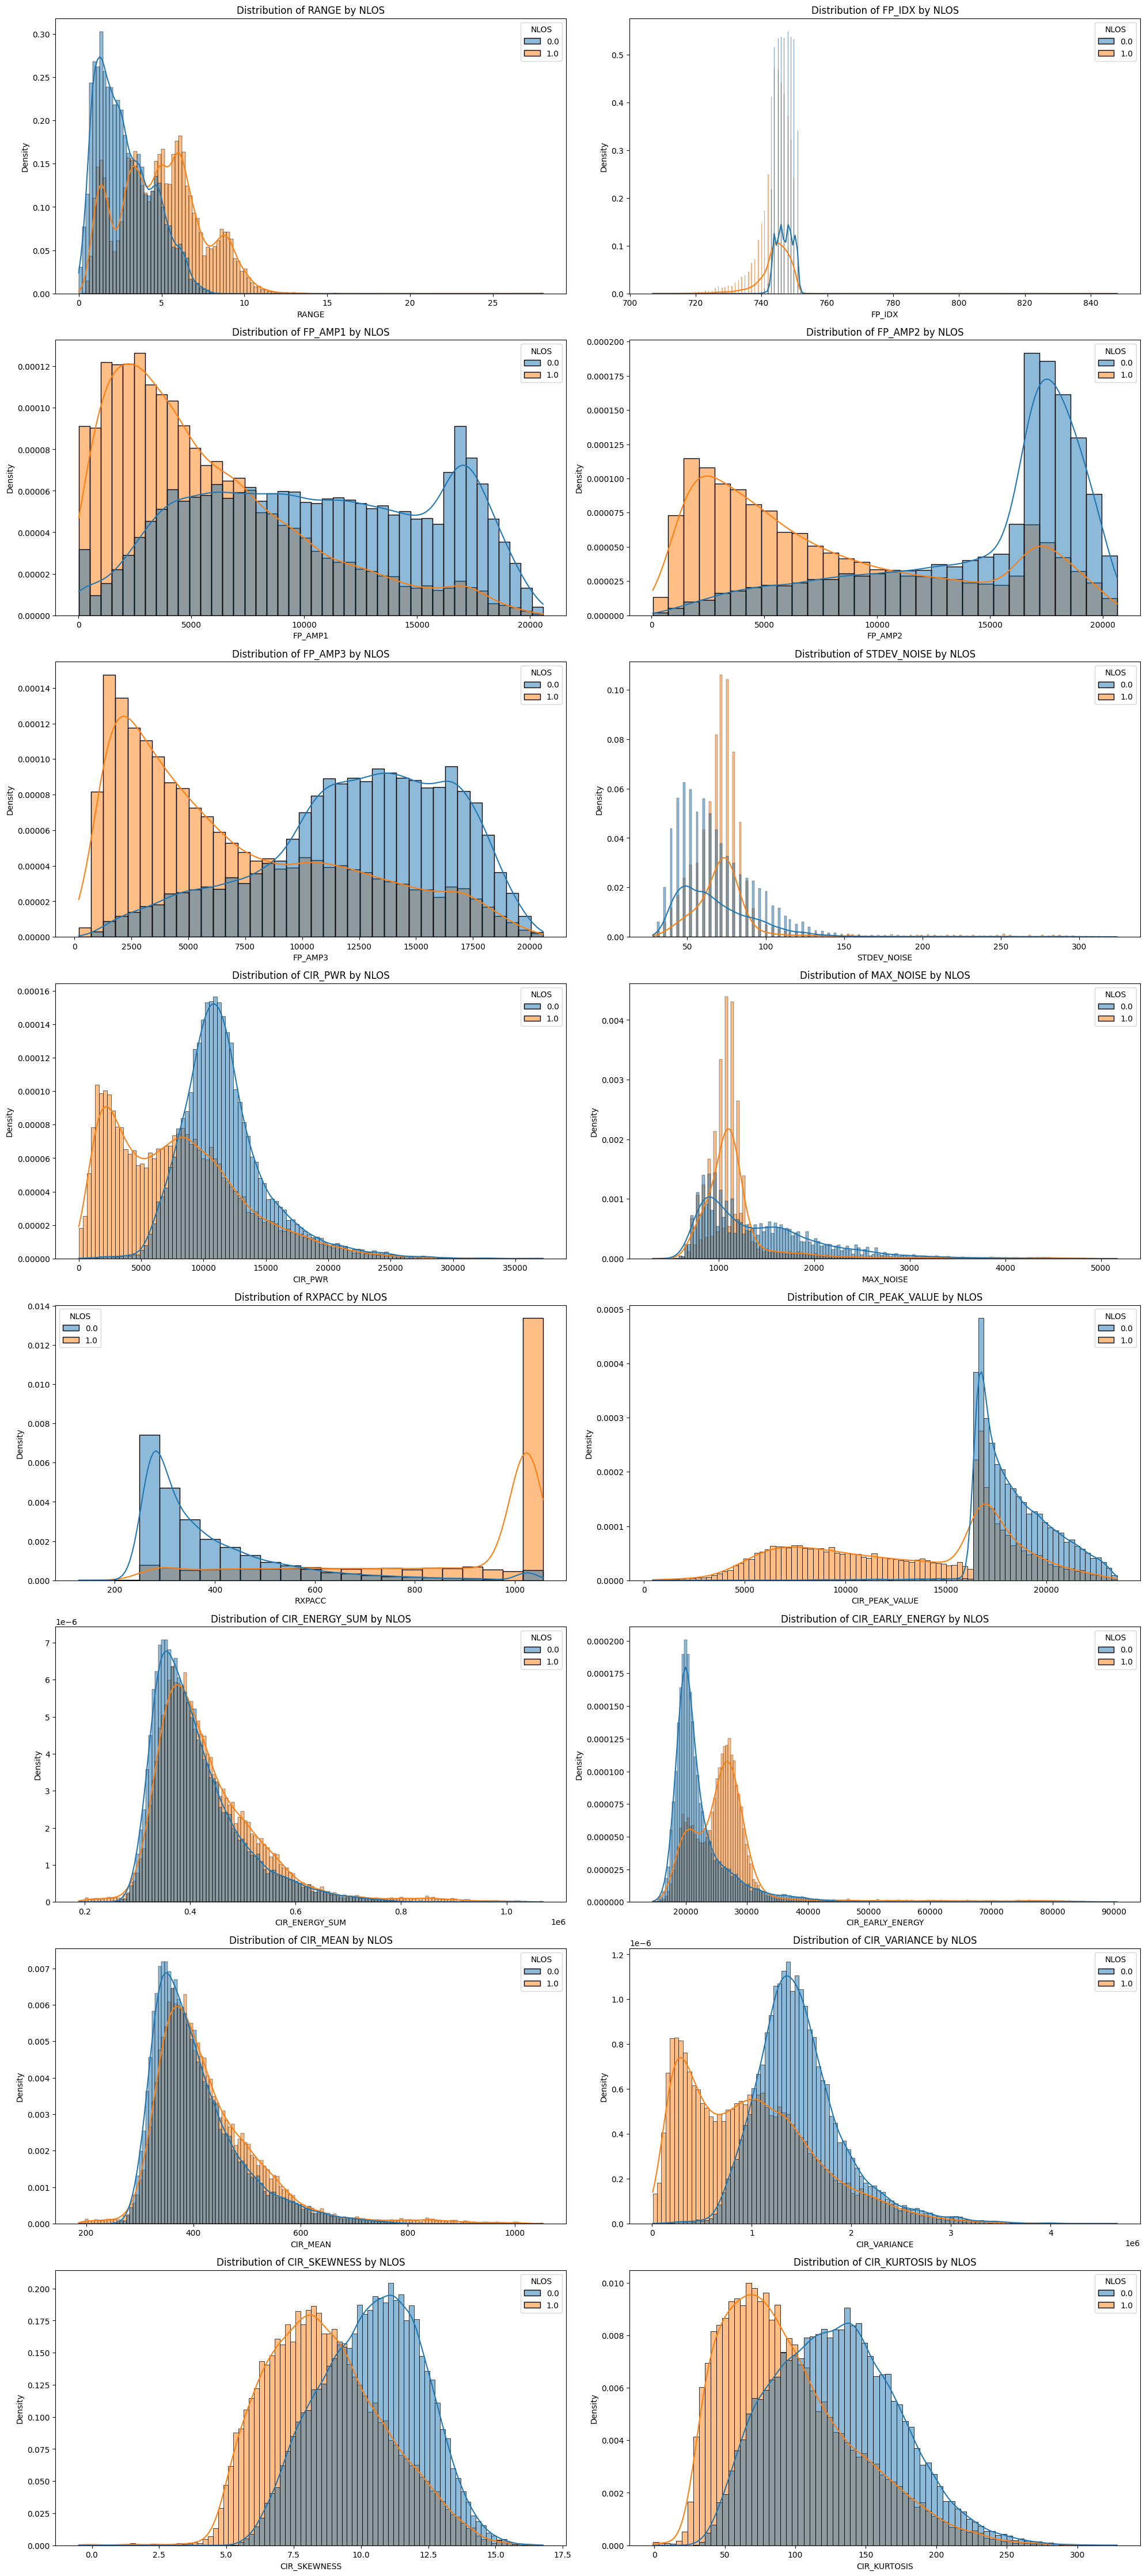

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with selected columns from df_combined
features = ['RANGE', 'FP_IDX', 'FP_AMP1', 'FP_AMP2', 'FP_AMP3', 
            'STDEV_NOISE','CIR_PWR','MAX_NOISE','RXPACC',
            'CIR_PEAK_VALUE','CIR_ENERGY_SUM','CIR_EARLY_ENERGY',
            'CIR_MEAN','CIR_VARIANCE','CIR_SKEWNESS','CIR_KURTOSIS']

# Plot numerical features with respect to the target variable
plt.figure(figsize=(20, 50))
for i, feature in enumerate(features, start=1):
    plt.subplot(len(features)//2 + 1, 2, i)
    sns.histplot(data=no_cir_df, x=feature, hue='NLOS', kde=True, stat='density', common_norm=False)
    plt.title(f'Distribution of {feature} by NLOS')
    plt.xlabel(feature)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()


Correlation Matrix against features excluding the individual CIR data, drop those above 0.7 or under -0.7

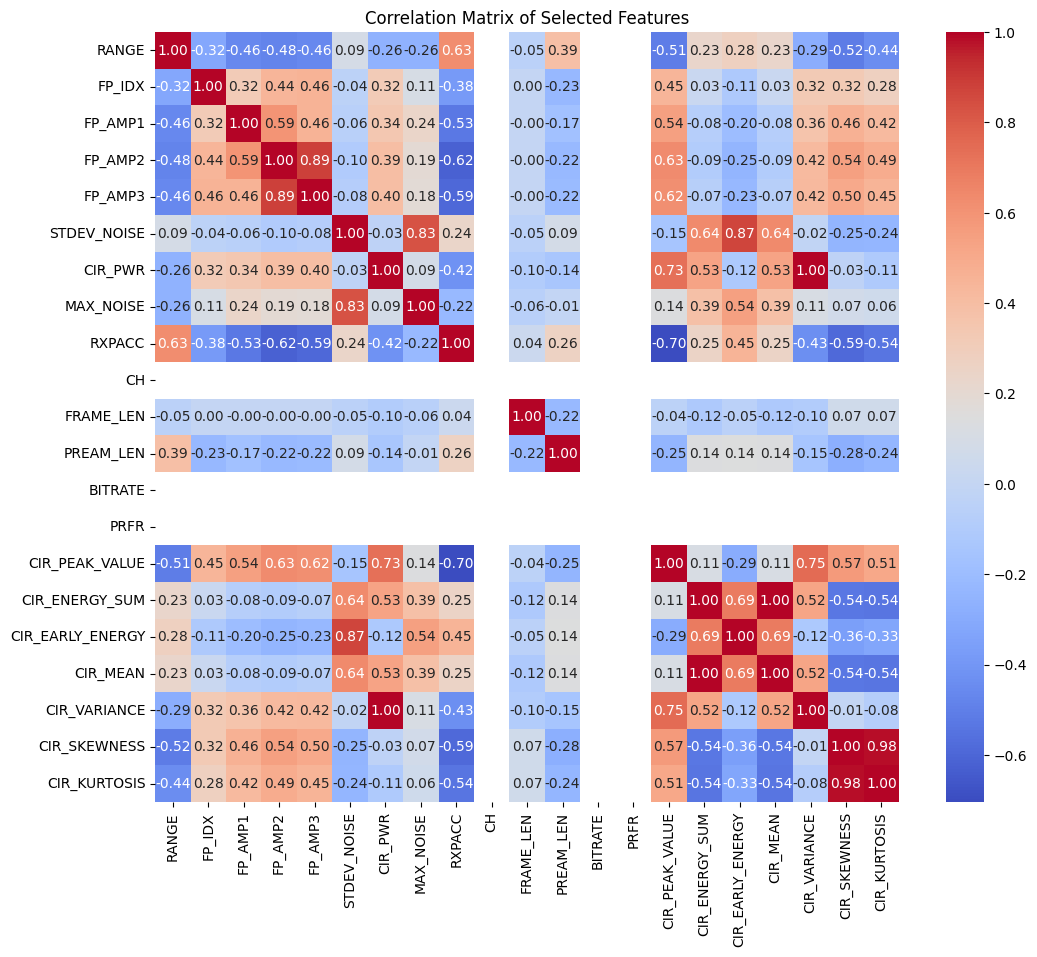

In [9]:
corr_df = no_cir_df.drop(columns='NLOS')
correlation_matrix = corr_df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Selected Features')
plt.show()

Feature Importance:
Standard Scaler normalisation

In [10]:
from sklearn.preprocessing import StandardScaler

temp_df = no_cir_df.drop(columns='NLOS').copy()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(temp_df)

df_scaled = pd.DataFrame(scaled_features, columns=no_cir_df.columns[1:])

df_scaled

df_scaled['NLOS'] = df['NLOS'].values

df_scaled.head()

,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,CH,...,BITRATE,PRFR,CIR_PEAK_VALUE,CIR_ENERGY_SUM,CIR_EARLY_ENERGY,CIR_MEAN,CIR_VARIANCE,CIR_SKEWNESS,CIR_KURTOSIS,NLOS
0,0.445036,-0.367187,-0.883791,0.048713,-0.226093,1.218181,2.707036,0.564711,0.122978,0.0,...,0.0,0.0,1.204340,2.869312,2.594143,2.869312,2.508702,-0.890665,-0.931266,0.0
1,-1.214594,0.076767,1.479155,0.952750,0.423541,-0.828298,0.335330,-0.218218,-1.096130,0.0,...,0.0,0.0,0.265790,-0.772046,-0.781943,-0.772046,0.396802,0.415196,0.145728,0.0
2,-1.172148,-0.145210,-0.745656,1.123069,1.668064,1.491045,0.395585,3.081760,-1.135245,0.0,...,0.0,0.0,0.443118,0.213299,0.016336,0.213299,0.460968,-0.113976,-0.259802,1.0
3,-1.244306,1.186652,1.133724,0.147664,1.481414,-0.419002,0.583677,0.168095,-1.053754,0.0,...,0.0,0.0,0.508552,-0.637949,-0.725730,-0.637949,0.461018,0.416940,0.173663,1.0
4,-0.442081,-0.367187,0.385940,0.876251,0.731635,-0.964730,0.099402,-0.983978,-0.662597,0.0,...,0.0,0.0,0.438537,-0.602311,-0.876871,-0.602311,0.091102,0.078818,-0.064380,0.0


In [11]:
from sklearn.ensemble import RandomForestClassifier

X = df_scaled.drop('NLOS', axis=1)
y = df_scaled['NLOS']

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame based on feature importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 20 most important features
feature_importance_df.head(20)

,Feature,Importance
2,FP_AMP1,0.071243
3,FP_AMP2,0.070796
4,FP_AMP3,0.070380
16,CIR_EARLY_ENERGY,0.069061
0,RANGE,0.069029
14,CIR_PEAK_VALUE,0.068623
20,CIR_KURTOSIS,0.065714
19,CIR_SKEWNESS,0.065302
18,CIR_VARIANCE,0.065298
7,MAX_NOISE,0.065226


## Alternative to Feature Engineering of the CIR datas

We try to calculate the eigen energy for the CIR Data Columns. To see how many number of components best expalains close to 90% of the variance.

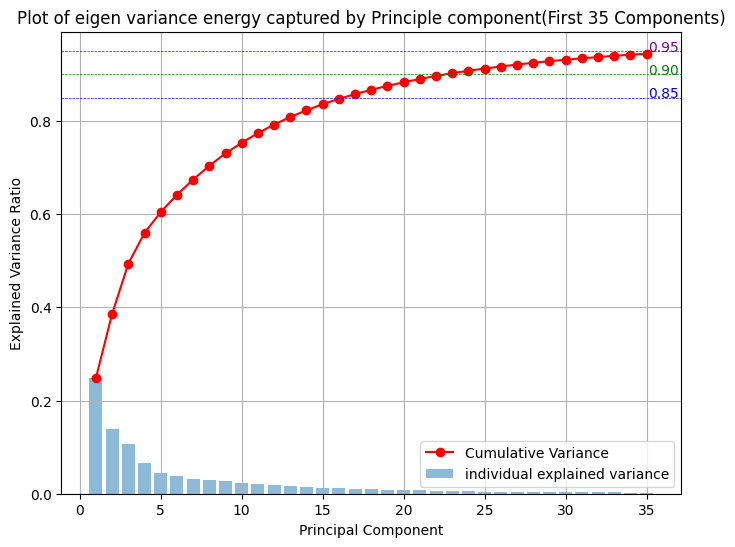

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Filter the dataset to only include the CIR columns and Class
df_for_cluster = pd.concat([df_combined.iloc[:, :1], df_combined.iloc[:, 15:-7]], axis=1).copy()
temp_cir_df = cir_df

# Apply PCA
pca = PCA()
pca.fit(temp_cir_df)

# Calculate explained variance ratio (eigen energy)
eigen_energy = pca.explained_variance_ratio_[:35]  # Consider only the first 35 components
cumulative_variance = np.cumsum(eigen_energy)  # Cumulative explained variance

# Plot the explained variance ratio for the first 12 components
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(eigen_energy) + 1), eigen_energy, alpha=0.5, align='center', label=f'individual explained variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, color='red', marker='o', label='Cumulative Variance')

# Plot horizontal lines for specified thresholds
thresholds = [0.85, 0.90, 0.95]
threshold_colors = ['blue', 'green', 'purple']
for threshold, color in zip(thresholds, threshold_colors):
    plt.axhline(y=threshold, color=color, linestyle='--', linewidth=0.5)
    plt.text(len(cumulative_variance) + 0.1, threshold, f'{threshold:.2f}', color=color)

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title(f"Plot of eigen variance energy captured by Principle component(First 35 Components)")
plt.legend()
plt.grid(True)
plt.show()

 _component = 25_ gives 90% accumulated variance. 

In [14]:
# Apply PCA
pca = PCA(n_components=25)
cir_df_pca = pca.fit_transform(temp_cir_df)

# Create a DataFrame for the PCA-transformed features
pca_columns = [f'PC{i+1}' for i in range(25)]  
cir_df_pca = pd.DataFrame(cir_df_pca, columns=pca_columns)

# Reset index for temp_cir_df (assuming it has the same length as df_combined.iloc[:, :15])
orginal_first15_df  = df_combined.iloc[:, :15]
orginal_first15_df.reset_index(drop=True, inplace=True)

# Project it back to my dataframe
df_combined_with_pca = pd.concat([orginal_first15_df, cir_df_pca], axis=1)
df_combined_with_pca


,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,0.0,4.88,744.0,3361.0,11729.0,8528.0,108.0,23088.0,1645.0,654.0,...,-5199.002457,699.813091,-4447.507815,-1197.444981,3803.191520,1021.513872,4747.147432,1459.359243,5580.202547,-513.972767
1,0.0,0.97,746.0,16105.0,17366.0,12005.0,48.0,11437.0,1189.0,280.0,...,745.757373,2122.685768,-726.806559,-464.465750,575.468898,-579.564140,344.508911,791.329208,144.031162,-339.837370
2,0.0,1.07,745.0,4106.0,18428.0,18666.0,116.0,11733.0,3111.0,268.0,...,917.906743,3317.818511,-2353.387073,3579.387964,1349.505051,476.705053,1947.539608,381.856624,-245.823538,2389.063331
3,0.0,0.90,751.0,14242.0,12346.0,17667.0,60.0,12657.0,1414.0,293.0,...,-1452.864674,-1543.261766,-1918.011821,-1789.012217,-3555.742806,1007.052910,1837.092613,-1315.586160,-991.383649,-388.249122
4,0.0,2.79,744.0,10209.0,16889.0,13654.0,44.0,10278.0,743.0,413.0,...,-1730.263195,2056.971801,-4280.995781,1716.716671,1569.397184,-1916.943215,-1909.931704,999.173475,1196.258446,-456.311950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,1.0,4.25,745.0,1020.0,3480.0,2152.0,80.0,4064.0,1188.0,1024.0,...,-2807.175388,-472.804210,200.954055,-473.432117,494.354362,-771.427829,-550.825477,-48.554377,-2370.490741,-668.905017
41996,1.0,2.25,744.0,1499.0,4062.0,3571.0,204.0,7307.0,3126.0,669.0,...,-1076.601721,-2630.630492,-73.774472,-1246.198510,7457.003003,4746.101579,651.370477,3134.103786,-1886.008467,250.442337
41997,0.0,2.48,750.0,12766.0,10939.0,6430.0,72.0,37130.0,1068.0,695.0,...,4400.375422,2582.843854,6552.349225,4258.158707,8608.993119,1690.889860,-8137.604530,-7610.049566,2393.132563,-4665.041033
41998,1.0,6.87,738.0,727.0,1515.0,890.0,72.0,12461.0,1071.0,808.0,...,242.601300,470.546079,659.339969,-2587.357559,-5481.562882,1595.343575,1952.747378,-2937.108696,1564.054137,-381.080459


## Alternative checking with K Cluster

In [15]:
# Filter the dataset to only include the CIR columns and Class
df_for_cluster = pd.concat([df_combined.iloc[:, :1], df_combined.iloc[:, 15:-7]], axis=1).copy()
df_for_cluster

,NLOS,CIR0,CIR1,CIR2,CIR3,CIR4,CIR5,CIR6,CIR7,CIR8,...,CIR1006,CIR1007,CIR1008,CIR1009,CIR1010,CIR1011,CIR1012,CIR1013,CIR1014,CIR1015
4507,0.0,733.0,363.0,497.0,618.0,387.0,703.0,536.0,321.0,298.0,...,408.0,713.0,446.0,273.0,340.0,494.0,378.0,546.0,30.0,256.0
3609,0.0,71.0,206.0,182.0,277.0,252.0,336.0,259.0,305.0,120.0,...,224.0,31.0,62.0,267.0,102.0,359.0,156.0,132.0,79.0,0.0
2543,0.0,348.0,293.0,334.0,336.0,246.0,186.0,475.0,197.0,447.0,...,250.0,419.0,311.0,185.0,274.0,258.0,212.0,305.0,56.0,256.0
3114,0.0,151.0,177.0,496.0,193.0,200.0,298.0,117.0,251.0,308.0,...,318.0,191.0,58.0,276.0,249.0,298.0,64.0,100.0,112.0,0.0
5379,0.0,127.0,81.0,340.0,134.0,297.0,269.0,291.0,201.0,207.0,...,272.0,129.0,264.0,77.0,104.0,313.0,234.0,74.0,165.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,1.0,173.0,60.0,216.0,348.0,384.0,182.0,96.0,252.0,271.0,...,198.0,335.0,291.0,138.0,176.0,224.0,210.0,205.0,289.0,0.0
2669,1.0,392.0,354.0,402.0,535.0,1146.0,283.0,972.0,562.0,117.0,...,1176.0,341.0,314.0,445.0,332.0,1000.0,1337.0,304.0,922.0,256.0
1066,0.0,309.0,295.0,242.0,301.0,187.0,144.0,118.0,171.0,291.0,...,219.0,246.0,71.0,374.0,183.0,16.0,160.0,266.0,269.0,256.0
1465,1.0,94.0,244.0,256.0,250.0,158.0,248.0,213.0,194.0,286.0,...,171.0,182.0,177.0,74.0,278.0,204.0,150.0,181.0,145.0,0.0


In [16]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming cir_data contains your data
cir_data = df_for_cluster.drop(columns=['NLOS']).values  # Extract CIR features

# Range of clusters to try
min_clusters = 2
max_clusters = 10

silhouette_scores = []
for k in range(min_clusters, max_clusters + 1):
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(cir_data)
    cluster_labels = kmeans.labels_
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(cir_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the optimal number of clusters with the highest silhouette score
optimal_num_clusters = np.argmax(silhouette_scores) + min_clusters

print(f"Optimal number of clusters based on silhouette score: {optimal_num_clusters}")

# Plot silhouette scores
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

KeyboardInterrupt: 

## K-Means Clustering Explanation

K-means clustering with k=2 clusters was chosen based on the silhouette score analysis, indicating optimal partitioning of Channel Impulse Response (CIR) data, where scaling was deemed unnecessary due to the data's minimal differences and uniform units.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

cir_data = df_for_cluster.drop(columns=['NLOS']).values  # Extract CIR features
classes = df_for_cluster['NLOS'].values  # Extract class labels

# No of clusters
k = 2

# Perform K-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(cir_data)
labels = kmeans.labels_

# Visualize the clustering results using PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_data = pca.fit_transform(cir_data)

# Plotting the clustered data
plt.figure(figsize=(10, 8))
for cluster_label in range(k):
    plt.scatter(pca_data[labels == cluster_label, 0], 
                pca_data[labels == cluster_label, 1], 
                s=2,  # Marker size
                label=f'Cluster {cluster_label + 1}'
                )

# Plot the centroid
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], 
            pca.transform(kmeans.cluster_centers_)[:, 1], 
            marker='*', s=300, c='red', label='Centroids')

plt.title('K-means Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

## Result Analysis: Density of Clusters by Class

The scatterplot generated from the Channel Impulse Response (CIR) data reveals two distinct clusters. However, this visualization solely represents the Principal Component Analysis (PCA) components. To gain deeper insights, it's imperative to assess the density of each cluster with respect to specific classes within the data.

In [ ]:
# Create DataFrame of cluster number against the class of the data
cluster_df = pd.DataFrame({'Cluster': labels, 'Class': classes})

# Group the DataFrame by cluster ID
grouped_clusters = cluster_df.groupby('Cluster')

# Iterate over groups and display them
for cluster_id, group in grouped_clusters:
    # print(f"Cluster {cluster_id}:\n{group}\n")
    class_counts = group['Class'].value_counts()
    print(class_counts)

Each cluster have the same number for Class NLOS and LOS, this means that the cluster have proper meaning